In [16]:
# Cell 1: Check and install required packages
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn',
    'scipy': 'scipy',
    'scikit-learn': 'scikit-learn',
    'statsmodels': 'statsmodels',
    'tkinter': None  # Usually comes with Python
}

print("Checking for required packages...\n")

for package_name, pip_name in required_packages.items():
    if pip_name is None:
        continue
    try:
        __import__(package_name)
        print(f"✓ {package_name} is already installed")
    except ImportError:
        print(f"✗ {package_name} not found. Installing...")
        try:
            install_package(pip_name)
            print(f"✓ {package_name} installed successfully")
        except Exception as e:
            print(f"✗ Error installing {package_name}: {e}")

print("\nAll required packages checked!")

Checking for required packages...

✓ pandas is already installed
✓ numpy is already installed
✓ matplotlib is already installed
✓ seaborn is already installed
✓ scipy is already installed
✗ scikit-learn not found. Installing...
✓ scikit-learn installed successfully
✓ statsmodels is already installed

All required packages checked!


In [17]:
# Cell 2: Import all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All packages imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All packages imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.3


In [18]:
# Cell 3: Read data file using file dialog
from tkinter import Tk, filedialog

def select_file():
    """Open file dialog to select data file"""
    root = Tk()
    root.withdraw()  # Hide the main window
    root.attributes('-topmost', True)  # Bring dialog to front
    
    file_path = filedialog.askopenfilename(
        title='Select the data file',
        filetypes=[
            ('CSV files', '*.csv'),
            ('Excel files', '*.xlsx *.xls'),
            ('All files', '*.*')
        ]
    )
    root.destroy()
    return file_path

# Select and read the file
print("Please select your data file...")
file_path = select_file()

if file_path:
    print(f"\nFile selected: {file_path}")
    
    # Read the file based on extension
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
    else:
        print("Unsupported file format. Please use CSV or Excel files.")
        df = None
    
    if df is not None:
        print("\n" + "="*60)
        print("DATA LOADED SUCCESSFULLY!")
        print("="*60)
        print(f"\nDataset shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print("\nFirst few rows:")
        print(df.head())
else:
    print("No file selected!")
    df = None

Please select your data file...

File selected: C:/Alby/PythonTraining/Skill Development/Python/Ad type analysis/adtypedata.csv

DATA LOADED SUCCESSFULLY!

Dataset shape: (52, 8)
Columns: ['date', 'week_id', 'sales', 'skippable_spend', 'non_skippable_spend', 'search_spend', 'display_spend', 'pmax_spend']

First few rows:
         date  week_id     sales  skippable_spend  non_skippable_spend  \
0  07-01-2024        1 418751.18         10996.34             32415.54   
1  14-01-2024        2 429388.39         15024.16             10484.70   
2  21-01-2024        3 446048.75         17796.88             40149.23   
3  28-01-2024        4 435555.11         16474.34             14271.74   
4  04-02-2024        5 426989.71         11470.82             41680.14   

   search_spend  display_spend  pmax_spend  
0      40120.35       15124.93    25130.60  
1      40871.42       16859.30    27010.45  
2      41641.70       18596.53    28965.71  
3      42431.84       20359.73    31000.75  
4      

In [19]:
# Cell 4: Data preprocessing and type enforcement
if df is not None:
    print("="*60)
    print("DATA PREPROCESSING")
    print("="*60)
    
    # Make a copy to preserve original
    df_processed = df.copy()
    
    # Convert date column to datetime
    if 'date' in df_processed.columns:
        df_processed['date'] = pd.to_datetime(df_processed['date'], format='%d-%m-%Y', errors='coerce')
        print("\n✓ Date column converted to datetime")
    
    # Identify numeric columns (excluding date and week_id)
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    
    # Identify ad spend columns
    ad_spend_cols = [col for col in df_processed.columns if 'spend' in col.lower()]
    
    print(f"\n✓ Identified {len(ad_spend_cols)} ad spend columns:")
    for col in ad_spend_cols:
        print(f"   - {col}")
    
    # Ensure numeric types for all relevant columns
    for col in numeric_cols:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
    
    # Check for missing values
    missing_values = df_processed.isnull().sum()
    if missing_values.sum() > 0:
        print("\n⚠ Missing values detected:")
        print(missing_values[missing_values > 0])
        
        # Fill missing values with 0 for ad spend columns
        for col in ad_spend_cols:
            df_processed[col].fillna(0, inplace=True)
        print("\n✓ Missing values in ad spend columns filled with 0")
    else:
        print("\n✓ No missing values detected")
    
    # Display basic statistics
    print("\n" + "-"*60)
    print("BASIC STATISTICS")
    print("-"*60)
    print(df_processed[['sales'] + ad_spend_cols].describe())
    
    print("\n✓ Data preprocessing completed!")
else:
    print("No data to process!")

DATA PREPROCESSING

✓ Date column converted to datetime

✓ Identified 5 ad spend columns:
   - skippable_spend
   - non_skippable_spend
   - search_spend
   - display_spend
   - pmax_spend

✓ No missing values detected

------------------------------------------------------------
BASIC STATISTICS
------------------------------------------------------------
          sales  skippable_spend  non_skippable_spend  search_spend  \
count     52.00            52.00                52.00         52.00   
mean  509552.36         17827.04             31160.23      72404.29   
std    43176.15          2966.27             15509.66      24574.10   
min   418751.18         10996.34              3082.95      40120.35   
25%   476864.60         16287.25             18781.61      51346.57   
50%   519711.82         17165.51             28875.26      67363.22   
75%   542385.45         18549.61             42728.74      90551.55   
max   575775.19         26618.30             66431.11     124174.90   

 

In [20]:
# Cell 5: Apply adstock transformation
def apply_adstock(x, decay_rate=0.5):
    """
    Apply adstock transformation to capture lagged effects of advertising
    
    Parameters:
    x: array-like, advertising spend data
    decay_rate: float between 0 and 1, rate at which ad effect decays
    
    Returns:
    array with adstock transformation applied
    """
    adstocked = np.zeros_like(x, dtype=float)
    adstocked[0] = x[0]
    
    for i in range(1, len(x)):
        adstocked[i] = x[i] + decay_rate * adstocked[i-1]
    
    return adstocked

if df is not None and df_processed is not None:
    print("="*60)
    print("APPLYING ADSTOCK TRANSFORMATION")
    print("="*60)
    
    # Sort by date to ensure proper time series order
    df_processed = df_processed.sort_values('date').reset_index(drop=True)
    
    # Apply adstock to each ad spend column
    decay_rate = 0.5  # You can adjust this parameter
    
    df_adstock = df_processed.copy()
    
    for col in ad_spend_cols:
        adstock_col_name = f"{col}_adstock"
        df_adstock[adstock_col_name] = apply_adstock(df_processed[col].values, decay_rate)
        print(f"✓ Adstock applied to {col} -> {adstock_col_name}")
    
    print(f"\n✓ Adstock transformation completed with decay rate: {decay_rate}")
    
    # Create list of adstock columns
    adstock_cols = [f"{col}_adstock" for col in ad_spend_cols]
    
    # Display comparison
    print("\n" + "-"*60)
    print("COMPARISON: Original vs Adstocked Values (First 5 rows)")
    print("-"*60)
    
    for col in ad_spend_cols:
        print(f"\n{col}:")
        comparison = pd.DataFrame({
            'Original': df_processed[col].head(),
            'Adstocked': df_adstock[f"{col}_adstock"].head()
        })
        print(comparison)
else:
    print("No data available for adstock transformation!")

APPLYING ADSTOCK TRANSFORMATION
✓ Adstock applied to skippable_spend -> skippable_spend_adstock
✓ Adstock applied to non_skippable_spend -> non_skippable_spend_adstock
✓ Adstock applied to search_spend -> search_spend_adstock
✓ Adstock applied to display_spend -> display_spend_adstock
✓ Adstock applied to pmax_spend -> pmax_spend_adstock

✓ Adstock transformation completed with decay rate: 0.5

------------------------------------------------------------
COMPARISON: Original vs Adstocked Values (First 5 rows)
------------------------------------------------------------

skippable_spend:
   Original  Adstocked
0  10996.34   10996.34
1  15024.16   20522.33
2  17796.88   28058.05
3  16474.34   30503.36
4  11470.82   26722.50

non_skippable_spend:
   Original  Adstocked
0  32415.54   32415.54
1  10484.70   26692.47
2  40149.23   53495.47
3  14271.74   41019.47
4  41680.14   62189.88

search_spend:
   Original  Adstocked
0  40120.35   40120.35
1  40871.42   60931.60
2  41641.70   72107.50
3

In [21]:
# Cell 6: Analyze contribution and impact of ad types on sales
if df_adstock is not None:
    print("="*60)
    print("AD TYPE EFFECTIVENESS ANALYSIS")
    print("="*60)
    
    # Prepare data for modeling
    X = df_adstock[adstock_cols].values
    y = df_adstock['sales'].values
    
    # Standardize features for better interpretation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 1. LINEAR REGRESSION MODEL
    print("\n1. LINEAR REGRESSION MODEL")
    print("-"*60)
    
    # Add constant for intercept
    X_with_const = sm.add_constant(X_scaled)
    
    # Fit model
    model = sm.OLS(y, X_with_const).fit()
    
    print(model.summary())
    
    # 2. CONTRIBUTION ANALYSIS
    print("\n\n2. CONTRIBUTION ANALYSIS")
    print("-"*60)
    
    # Calculate contributions
    coefficients = model.params[1:]  # Exclude intercept
    
    # Calculate percentage contribution
    total_effect = np.sum(np.abs(coefficients))
    contributions = (np.abs(coefficients) / total_effect * 100) if total_effect > 0 else np.zeros_like(coefficients)
    
    contribution_df = pd.DataFrame({
        'Ad Type': [col.replace('_adstock', '') for col in adstock_cols],
        'Coefficient': coefficients,
        'Absolute Coefficient': np.abs(coefficients),
        'Contribution (%)': contributions,
        'P-value': model.pvalues[1:],
        'Significant (p<0.05)': model.pvalues[1:] < 0.05
    })
    
    contribution_df = contribution_df.sort_values('Contribution (%)', ascending=False)
    print("\n", contribution_df)
    
    # 3. ROI CALCULATION
    print("\n\n3. RETURN ON INVESTMENT (ROI) ANALYSIS")
    print("-"*60)
    
    roi_data = []
    
    for i, col in enumerate(adstock_cols):
        original_col = col.replace('_adstock', '')
        total_spend = df_adstock[original_col].sum()
        
        # Predicted sales contribution (using original scale)
        X_original = df_adstock[adstock_cols].values
        contribution_sales = model.params[i+1] * X_original[:, i]
        total_sales_contribution = contribution_sales.sum()
        
        roi = (total_sales_contribution / total_spend - 1) * 100 if total_spend > 0 else 0
        
        roi_data.append({
            'Ad Type': original_col,
            'Total Spend': total_spend,
            'Sales Contribution': total_sales_contribution,
            'ROI (%)': roi
        })
    
    roi_df = pd.DataFrame(roi_data).sort_values('ROI (%)', ascending=False)
    print("\n", roi_df)
    
    # 4. MODEL PERFORMANCE
    print("\n\n4. MODEL PERFORMANCE METRICS")
    print("-"*60)
    
    y_pred = model.predict(X_with_const)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    
    print(f"\nR-squared: {r2:.4f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    # 5. MULTICOLLINEARITY CHECK
    print("\n\n5. MULTICOLLINEARITY CHECK (VIF)")
    print("-"*60)
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = [col.replace('_adstock', '') for col in adstock_cols]
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print("\n", vif_data)
    print("\nNote: VIF > 10 indicates high multicollinearity")
    
    # Store results for visualization
    results = {
        'contribution_df': contribution_df,
        'roi_df': roi_df,
        'model': model,
        'y_actual': y,
        'y_pred': y_pred,
        'r2': r2,
        'vif_data': vif_data
    }
    
    print("\n✓ Analysis completed successfully!")
else:
    print("No data available for analysis!")

AD TYPE EFFECTIVENESS ANALYSIS

1. LINEAR REGRESSION MODEL
------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     165.3
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           3.37e-28
Time:                        20:20:18   Log-Likelihood:                -551.77
No. Observations:                  52   AIC:                             1116.
Df Residuals:                      46   BIC:                             1127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

GENERATING VISUALIZATIONS


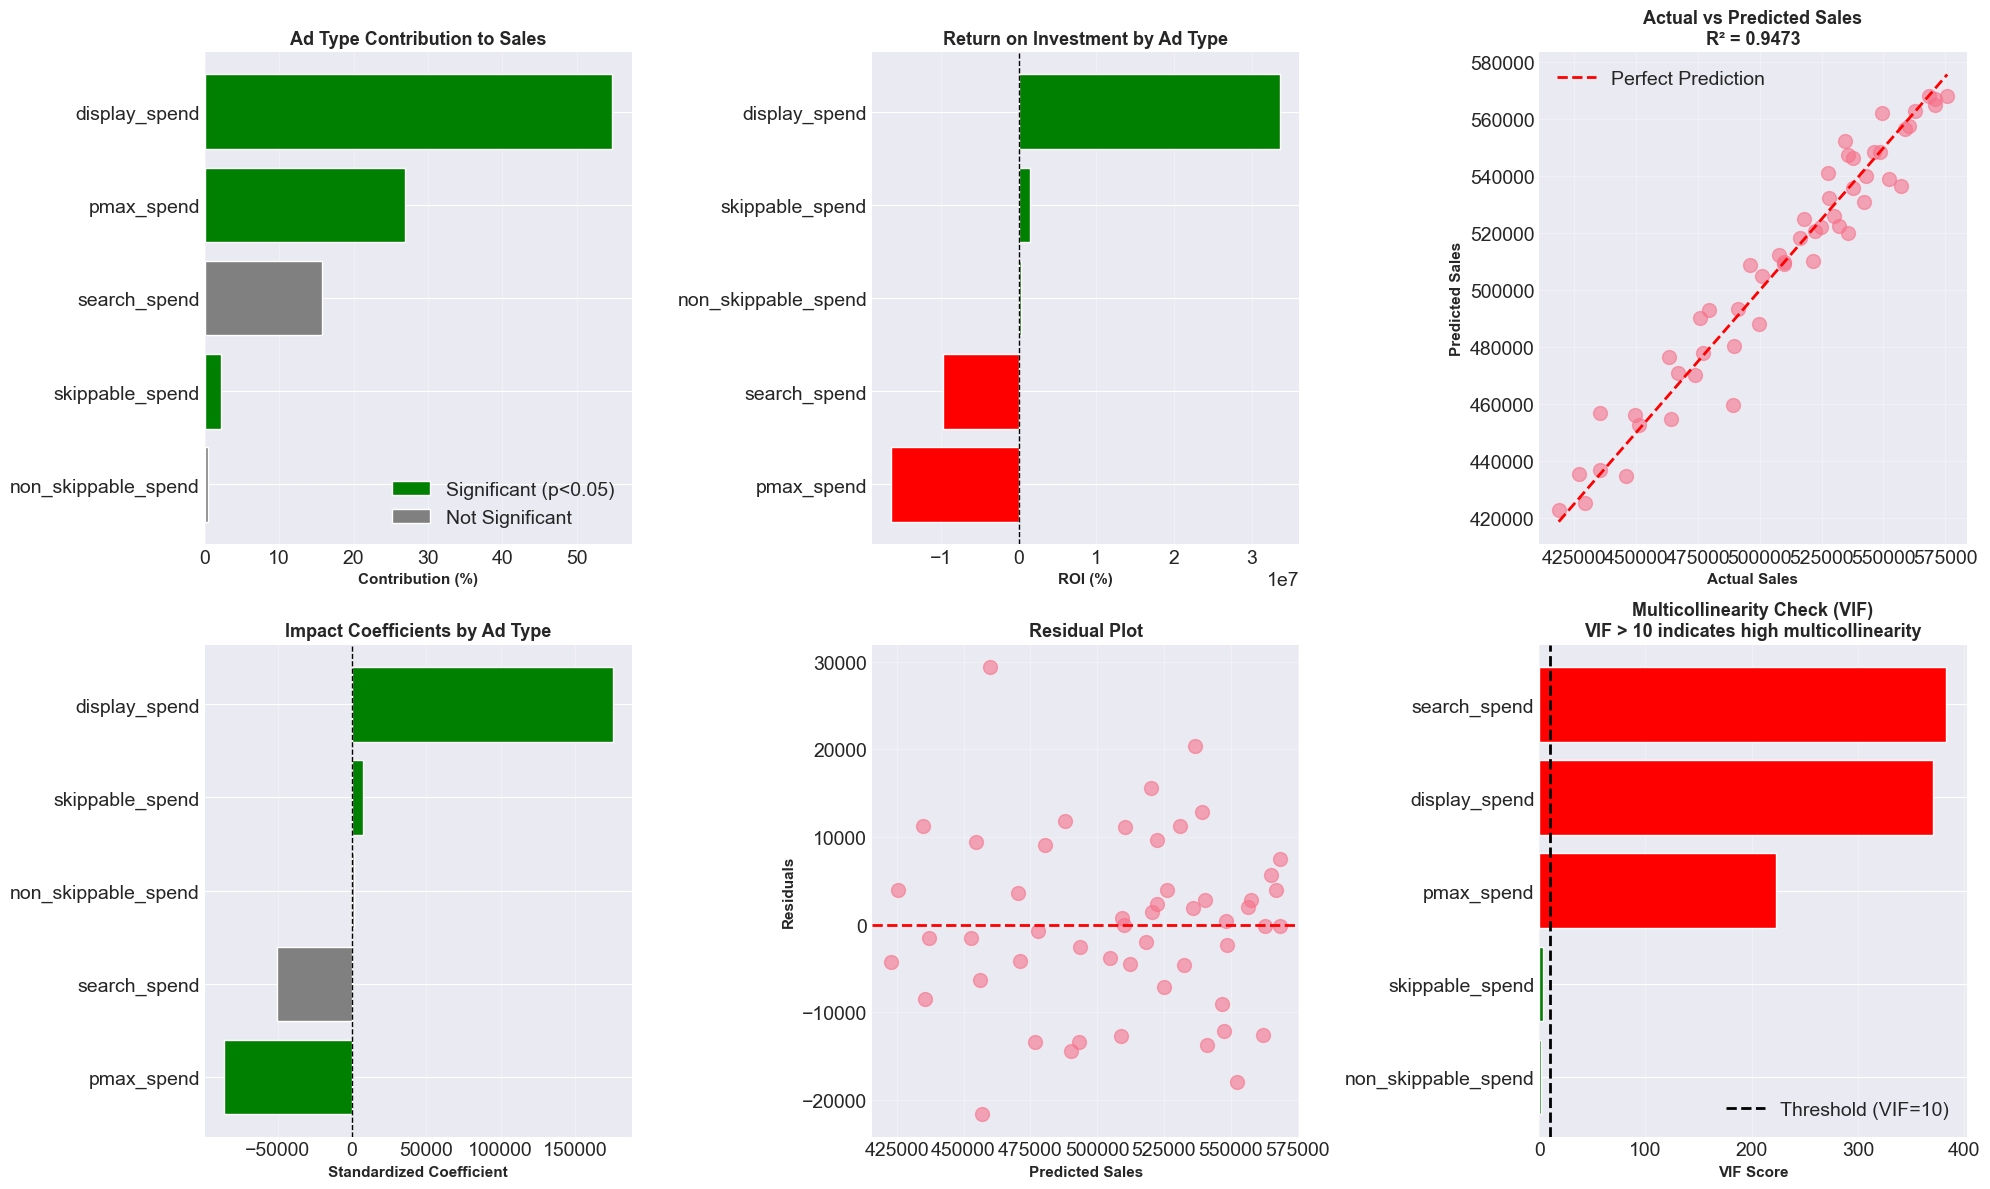


✓ All visualizations generated successfully!


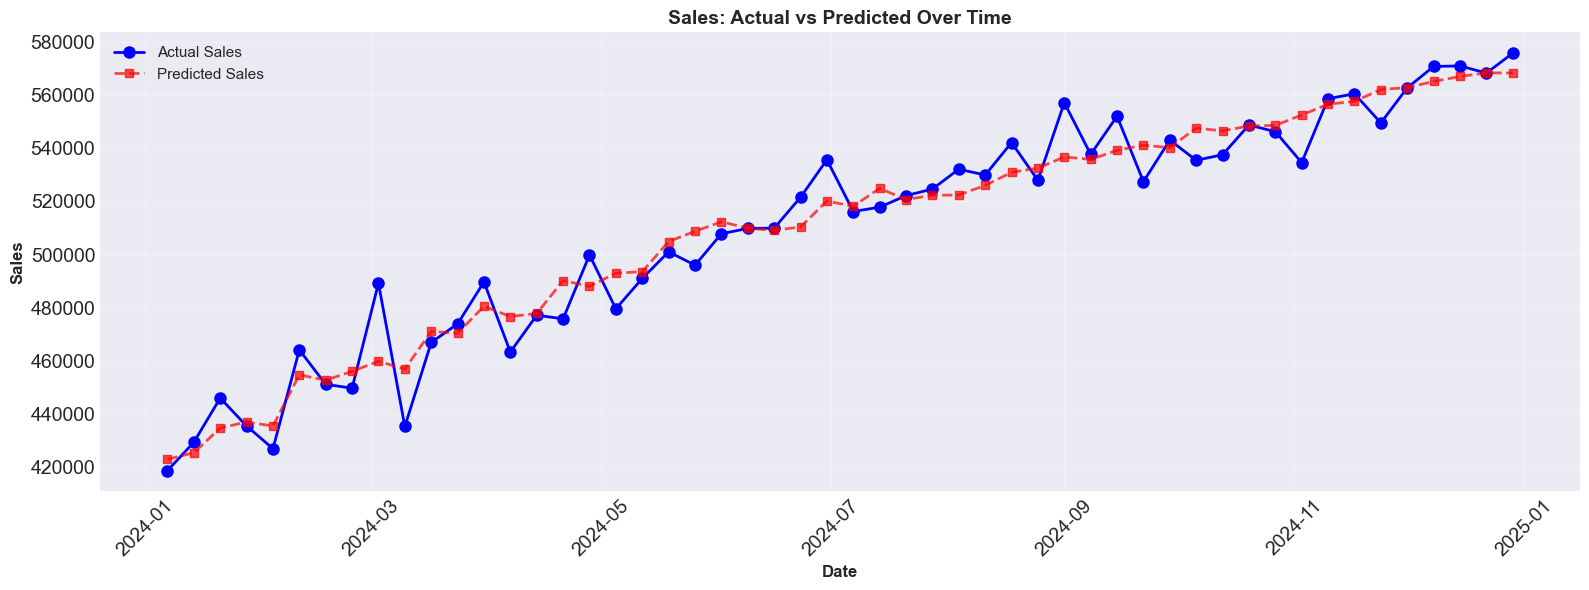


ANALYSIS COMPLETE!


In [22]:
# Cell 7: Visualize results
if 'results' in locals():
    print("="*60)
    print("GENERATING VISUALIZATIONS")
    print("="*60)
    
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Contribution by Ad Type
    plt.subplot(2, 3, 1)
    contribution_plot = results['contribution_df'].sort_values('Contribution (%)', ascending=True)
    colors = ['green' if sig else 'gray' for sig in contribution_plot['Significant (p<0.05)']]
    plt.barh(contribution_plot['Ad Type'], contribution_plot['Contribution (%)'], color=colors)
    plt.xlabel('Contribution (%)', fontsize=11, fontweight='bold')
    plt.title('Ad Type Contribution to Sales', fontsize=13, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', label='Significant (p<0.05)'),
                      Patch(facecolor='gray', label='Not Significant')]
    plt.legend(handles=legend_elements, loc='lower right')
    
    # 2. ROI by Ad Type
    plt.subplot(2, 3, 2)
    roi_plot = results['roi_df'].sort_values('ROI (%)', ascending=True)
    colors = ['green' if roi > 0 else 'red' for roi in roi_plot['ROI (%)']]
    plt.barh(roi_plot['Ad Type'], roi_plot['ROI (%)'], color=colors)
    plt.xlabel('ROI (%)', fontsize=11, fontweight='bold')
    plt.title('Return on Investment by Ad Type', fontsize=13, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.grid(axis='x', alpha=0.3)
    
    # 3. Actual vs Predicted Sales
    plt.subplot(2, 3, 3)
    plt.scatter(results['y_actual'], results['y_pred'], alpha=0.6, s=100)
    plt.plot([results['y_actual'].min(), results['y_actual'].max()], 
             [results['y_actual'].min(), results['y_actual'].max()], 
             'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Sales', fontsize=11, fontweight='bold')
    plt.ylabel('Predicted Sales', fontsize=11, fontweight='bold')
    plt.title(f'Actual vs Predicted Sales\nR² = {results["r2"]:.4f}', 
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # 4. Coefficients with Confidence Intervals
    plt.subplot(2, 3, 4)
    contrib_df = results['contribution_df'].sort_values('Coefficient', ascending=True)
    y_pos = np.arange(len(contrib_df))
    plt.barh(y_pos, contrib_df['Coefficient'], 
             color=['green' if sig else 'gray' for sig in contrib_df['Significant (p<0.05)']])
    plt.yticks(y_pos, contrib_df['Ad Type'])
    plt.xlabel('Standardized Coefficient', fontsize=11, fontweight='bold')
    plt.title('Impact Coefficients by Ad Type', fontsize=13, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.grid(axis='x', alpha=0.3)
    
    # 5. Residuals Plot
    plt.subplot(2, 3, 5)
    residuals = results['y_actual'] - results['y_pred']
    plt.scatter(results['y_pred'], residuals, alpha=0.6, s=100)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Sales', fontsize=11, fontweight='bold')
    plt.ylabel('Residuals', fontsize=11, fontweight='bold')
    plt.title('Residual Plot', fontsize=13, fontweight='bold')
    plt.grid(alpha=0.3)
    
    # 6. VIF Scores
    plt.subplot(2, 3, 6)
    vif_plot = results['vif_data'].sort_values('VIF', ascending=True)
    colors = ['red' if vif > 10 else 'green' for vif in vif_plot['VIF']]
    plt.barh(vif_plot['Feature'], vif_plot['VIF'], color=colors)
    plt.xlabel('VIF Score', fontsize=11, fontweight='bold')
    plt.title('Multicollinearity Check (VIF)\nVIF > 10 indicates high multicollinearity', 
              fontsize=13, fontweight='bold')
    plt.axvline(x=10, color='black', linestyle='--', linewidth=2, label='Threshold (VIF=10)')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ All visualizations generated successfully!")
    
    # Additional time series plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    ax.plot(df_adstock['date'], df_adstock['sales'], 
            marker='o', linewidth=2, markersize=8, label='Actual Sales', color='blue')
    ax.plot(df_adstock['date'], results['y_pred'], 
            marker='s', linewidth=2, markersize=6, label='Predicted Sales', 
            color='red', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Sales', fontsize=12, fontweight='bold')
    ax.set_title('Sales: Actual vs Predicted Over Time', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE!")
    print("="*60)
else:
    print("No results available for visualization!")